***
# Examen
## Diplomado Ciencia de Datos - modulo II  
  
***  
  
  
**Profesora: Carla Paola Malerva Reséndiz**  
**Hernández González Ricardo Paramont**  

**DataSet**:  data_examen.csv   
    
**Módulo con funciones personales empleadas**: modulo2_hernandez_gonzalez_ricardo_paramont.py

*********

### Importación de bibliotecas

In [1]:
import sys
import random
import pickle
#bibliotecas para manejo de datos
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

### Importación de módulo personal

In [1]:
import modulo_hernandez_paramont as mine

### Importación del dataset

##### Campos de información
• **key** : Variable que debe indicar el id del viaje, sin embargo no tiene informaci ́on
correcta , por lo cual no hace caso de dicha variable.  
• **fare amount**: Monto de la tarifa asociado a cada viaje, la tarifa incluye gastos de
peaje.  
• **pickup datetime** : Fecha y hora en la que se comenz ́o el viaje  
• **pickup longitude** : Longitud donde comenz ́o el recorrido  
• **pickup latitude** : Latitud donde comenz ́o el recorrido  
• **dropoff longitude** : Longitud donde concluy ́o el recorrido  
• **dropoff latitude** : Latitud donde concluy ́o el recorrido  
• **passenger count** : N ́umero de pasajeros durante el trayecto  
• **fare class** : Tipo de tafira que se cobr ́o, una tarifa baja o una tarifa alta.  

In [3]:
#Importando dataset
df = pd.read_csv('data_examen.csv')
df_test = df.copy()#dataset para probar pipeline
df.head()

key  fare_amount          pickup_datetime  \
0   2012-11-11 13:45:00.00000029         12.5  2012-11-11 13:45:00 UTC   
1   2010-01-26 00:13:00.00000050         11.3  2010-01-26 00:13:00 UTC   
2  2014-10-07 19:24:00.000000235         19.5  2014-10-07 19:24:00 UTC   
3    2012-10-20 13:48:40.0000002         10.5  2012-10-20 13:48:40 UTC   
4  2014-04-29 20:27:00.000000186          7.0  2014-04-29 20:27:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.956322        40.813427         -73.959143         40.783220   
1        -73.982577        40.746018         -73.980713         40.780807   
2        -73.972000        40.759470         -74.006190         40.708460   
3        -74.002701        40.728209         -74.013599         40.710990   
4        -73.982517        40.770782         -73.979932         40.754880   

   passenger_count fare_class  
0                1   low_fare  
1                1   low_fare  
2                2   low_fare  
3                1   low_fare  
4                1   low_fare

**se desecha la columna key** como indica el documento del examen.

In [4]:
borrar_key = mine.DeleteColumns('key')
df = borrar_key.transform(df)

In [5]:
pipeline_list = [('borrar_key',borrar_key)]

***

***
# <p style="text-align: center;">Procesamiento de datos</p>



***

***

## Etiquetado variables 

In [6]:
feat_dict={
    'c_feats': ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude'],
    'v_feats': ['passenger_count','fare_class'],
    'd_feats': ['pickup_datetime'],
    't_feats': []
}
#Usando transformer LabelColumns
etiquetar_columnas = mine.LabelColumns(feat_dict)
df = etiquetar_columnas.transform(df)
df.columns

Index(['c_fare_amount', 'd_pickup_datetime', 'c_pickup_longitude',
       'c_pickup_latitude', 'c_dropoff_longitude', 'c_dropoff_latitude',
       'v_passenger_count', 'v_fare_class'],
      dtype='object')

In [7]:
pipeline_list.append(('etiquetar_columnas',etiquetar_columnas))

## Completitud

In [8]:
mine.completitud(df)

columna  total  completitud
0  c_dropoff_longitude      7       99.999
1   c_dropoff_latitude      7       99.999
2        c_fare_amount      0      100.000
3    d_pickup_datetime      0      100.000
4   c_pickup_longitude      0      100.000
5    c_pickup_latitude      0      100.000
6    v_passenger_count      0      100.000
7         v_fare_class      0      100.000

Existen 7 registros sin datos de destino. Dichos datos no nos sirven, se eliminan.

In [9]:
df = df.dropna()
len(df)

599993

## Duplicados

In [10]:
#Numero de duplicados
df.duplicated().sum()

0

No hay duplicados identicos.

## Consistencia 

In [11]:
#Estdísticas simples de cada columna
df.describe(include='all')

c_fare_amount        d_pickup_datetime  c_pickup_longitude  \
count   599993.000000                   599993       599993.000000   
unique            NaN                   545196                 NaN   
top               NaN  2014-11-19 17:41:00 UTC                 NaN   
freq              NaN                        6                 NaN   
mean        11.369561                      NaN          -72.515333   
std          9.882071                      NaN           12.876891   
min        -44.900000                      NaN        -3377.680935   
25%          6.000000                      NaN          -73.992057   
50%          8.500000                      NaN          -73.981785   
75%         12.500000                      NaN          -73.967090   
max        495.000000                      NaN         2522.271325   

        c_pickup_latitude  c_dropoff_longitude  c_dropoff_latitude  \
count       599993.000000        599993.000000       599993.000000   
unique                NaN                  NaN                 NaN   
top                   NaN                  NaN                 NaN   
freq                  NaN                  NaN                 NaN   
mean            39.923619           -72.524198           39.909293   
std              8.464781            11.833594            9.101683   
min          -3116.285383         -3383.296608        -3114.338567   
25%             40.734945           -73.991383           40.734042   
50%             40.752730           -73.980102           40.753202   
75%             40.767213           -73.963607           40.768147   
max           2621.628430            40.851027          404.716667   

        v_passenger_count v_fare_class  
count       599993.000000       599993  
unique                NaN            2  
top                   NaN     low_fare  
freq                  NaN       543533  
mean             1.684315          NaN  
std              1.333951          NaN  
min              0.000000          NaN  
25%              1.000000          NaN  
50%              1.000000          NaN  
75%              2.000000          NaN  
max            208.000000          NaN

In [12]:
#Revisando tipo de dato
df.dtypes

c_fare_amount          float64
d_pickup_datetime       object
c_pickup_longitude     float64
c_pickup_latitude      float64
c_dropoff_longitude    float64
c_dropoff_latitude     float64
v_passenger_count        int64
v_fare_class            object
dtype: object

* Hay datos fuera de rango
* Hay datos con el tipo de dato incorrecto

#### fecha

In [13]:
#Usando el transformer ToDatetime
transformar_datetime = mine.ToDatetime(columns=['d_pickup_datetime'])
df = transformar_datetime.transform(df)
# Revisando valores maximos y minimos
print('min: ',min(df['d_pickup_datetime']))
print('max: ',max(df['d_pickup_datetime']))

min:  2009-01-01 00:00:46+00:00
max:  2015-06-30 23:53:23+00:00


In [14]:
pipeline_list.append(('transformar_datetime',transformar_datetime))

***
#### logitud y latitud

* logitud: valores entre -180 y 180
* latitud: valores entre -90 y 90

In [15]:
# c_pickup_longitude 
out_range = df['c_pickup_longitude'][(df['c_pickup_longitude']<-180)|(df['c_pickup_longitude']>180)]
out_range

114220    2522.271325
122394    -736.416665
206343    -735.888333
366493   -3377.680935
380235   -1452.988333
403077    -740.000000
425880   -2986.242495
444375    2140.601160
Name: c_pickup_longitude, dtype: float64

In [16]:
# borrar dichos registros
df = df.drop(out_range.index)

In [17]:
# c_pickup_latitude 
out_range = df['c_pickup_latitude'][(df['c_pickup_latitude']<-90)|(df['c_pickup_latitude']>90)]
out_range

64516       91.266667
133946     404.966667
220755   -3116.285383
431544     424.083332
550298     405.133332
Name: c_pickup_latitude, dtype: float64

In [18]:
# borrar dichos registros
df = df.drop(out_range.index)

In [19]:
# c_dropoff_longitude
out_range = df['c_dropoff_longitude'][(df['c_dropoff_longitude']<-180)|(df['c_dropoff_longitude']>180)]
out_range

33273     -740.066667
100812    -736.416665
108096    -736.500000
295526    -740.000000
434751   -1329.621332
573884    -472.266667
Name: c_dropoff_longitude, dtype: float64

In [20]:
# borrar dichos registros
df = df.drop(out_range.index)

In [21]:
# c_dropoff_latitude 
out_range = df['c_dropoff_latitude'][(df['c_dropoff_latitude']<-90)|(df['c_dropoff_latitude']>90)]
out_range

117668     404.716667
157185     404.616667
293101     404.466667
342980   -3114.338567
391915     404.133332
413069     404.133332
Name: c_dropoff_latitude, dtype: float64

In [22]:
# borrar dichos registros
df = df.drop(out_range.index)

In [23]:
#Revisamos nuevamente si todos los registros están dentro de los rangos
df[['c_pickup_longitude','c_pickup_latitude','c_dropoff_longitude','c_dropoff_latitude']].describe()

c_pickup_longitude  c_pickup_latitude  c_dropoff_longitude  \
count       599968.000000      599968.000000        599968.000000   
mean           -72.507437          39.921629           -72.506178   
std             10.425028           6.098020            10.424981   
min           -128.175950         -74.016587          -121.285388   
25%            -73.992056          40.734945           -73.991383   
50%            -73.981785          40.752730           -73.980102   
75%            -73.967090          40.767213           -73.963607   
max             40.812887          69.400000            40.851027   

       c_dropoff_latitude  
count       599968.000000  
mean            39.922324  
std              6.097637  
min            -74.035197  
25%             40.734042  
50%             40.753201  
75%             40.768147  
max             81.510177

#### conteo de pasajeros

In [24]:
df['v_passenger_count'].value_counts()

1      415038
2       88627
5       42219
3       26323
4       12922
6       12715
0        2123
208         1
Name: v_passenger_count, dtype: int64

In [25]:
#Se aceptan los viajes con 0 pasajeros, como si se usará el servicio para transportar un bien.
#Eliminando el único registro anomalo, con 208 pasajeros
out_range = df[df['v_passenger_count']==208]
df = df.drop(out_range.index)

#### tarifa

In [26]:
#fare_class
df['v_fare_class'].value_counts()
#todo en orden

low_fare     543510
high_fare     56457
Name: v_fare_class, dtype: int64

* Se eliminan los registros con un fare amount negativo por obvias razones.
* Se eliminan los de valores cercanos a cero porque al ser tratador como flotantes, en realidad tienen un valor muy pequeño distinto a cero que entrpecen el entramiento. 

In [27]:
#fare_amount
#Se rechazan valores negativos.Se aceptan valores de cero, suponiendo que existen viajes gratuitos.
out_range = df['c_fare_amount'][df['c_fare_amount']<0.1]
out_range

22597      0.00
41704     -2.50
48707      0.01
75261      0.00
83429     -2.50
85442     -3.00
95930      0.00
115048    -5.00
121743    -6.50
128965     0.00
131862    -5.00
159068    -4.50
185707    -2.90
210493    -3.00
240652     0.01
289810    -2.50
307767    -2.50
308380     0.00
311992    -5.00
323537    -2.90
325217     0.00
332630     0.01
342828     0.00
344673     0.00
350507    -6.50
351882    -2.50
370808     0.00
375267    -2.50
378988     0.00
402207     0.01
409116     0.01
416485     0.00
434444    -3.00
458942     0.00
471679    -2.50
491770     0.00
493824   -18.10
537732     0.01
540314   -44.90
550621    -2.50
555483    -6.50
569479    -2.50
569507    -2.50
579340   -29.87
Name: c_fare_amount, dtype: float64

In [28]:
#borrar dichos registros
df = df.drop(out_range.index)

# Análisis exploratorio

### v_fare_class

In [29]:
mine.my_pie_count(df,'v_fare_class','Distribución de la clase de tarifa')

In [30]:
df_aux = df[['v_fare_class','v_passenger_count']]
df_aux['year'] = df['d_pickup_datetime'].dt.year
df_aux = df_aux.sample(n=10_000,random_state=0)

In [31]:
import plotly.express as px
fig= px.histogram(df_aux, x="v_passenger_count", color="v_fare_class",marginal='box',
                  color_discrete_sequence=['#6faa9f','#344647','#779a7c'], 
                  opacity=0.65
                  )
fig.update_layout(title_text='Distribución de la tarifa según el número de pasajeros',
                  title_font_size=20,
                  title_font_color="#002020",
                  xaxis_title_text='número de pasajeros',
                  yaxis_title='conteo',
                  plot_bgcolor="rgb(208,208,208)",
                  font=dict(
                     family="Arial",size=13)
    )
fig.show()

### c_fare_amount

In [32]:
df_aux = df[df['c_fare_amount'] < 80]
df_aux = df_aux.sample(n=10_000,random_state=0)
mine.my_histogram(df_aux,'c_fare_amount', 16, 'Distribución de la tarifa')

In [33]:
df_aux = df[df['c_fare_amount'] < 40]
df_aux['year'] = df['d_pickup_datetime'].dt.year
df_aux = df_aux.sample(n=10_000,random_state=0)
mine.my_box(df_aux, 'year', 'c_fare_amount', 'Distribución de la tarifa según el año')

In [34]:
mine.my_box(df_aux, 'v_passenger_count', 'c_fare_amount', 'Distribución de la tarifa según el número de pasajeros')

# Outliers

#### longitud y latitud

In [35]:
outliers= mine.z_score_outliers(df,['c_pickup_longitude','c_pickup_latitude','c_dropoff_longitude','c_dropoff_latitude'])
outliers

features  n_outliers  n_outliers_%  \
0   c_pickup_longitude       11748          0.02   
1    c_pickup_latitude       11687          0.02   
2  c_dropoff_longitude       11749          0.02   
3   c_dropoff_latitude       11683          0.02   

                                             indices  
0  [34, 101, 194, 246, 294, 349, 458, 471, 596, 6...  
1  [34, 101, 194, 246, 294, 349, 458, 471, 596, 6...  
2  [34, 101, 194, 246, 294, 349, 458, 471, 596, 6...  
3  [34, 101, 194, 246, 294, 349, 458, 471, 596, 6...

In [36]:
#revisando outliers
indices = outliers[outliers["features"]=="c_pickup_longitude"]["indices"]
df[df.index.isin(indices.values[0])][['c_pickup_longitude','c_pickup_latitude','c_dropoff_longitude','c_dropoff_latitude']]

c_pickup_longitude  c_pickup_latitude  c_dropoff_longitude  \
34                     0.0                0.0                  0.0   
101                    0.0                0.0                  0.0   
194                    0.0                0.0                  0.0   
246                    0.0                0.0                  0.0   
294                    0.0                0.0                  0.0   
...                    ...                ...                  ...   
599905                 0.0                0.0                  0.0   
599926                 0.0                0.0                  0.0   
599939                 0.0                0.0                  0.0   
599992                 0.0                0.0                  0.0   
599997                 0.0                0.0                  0.0   

        c_dropoff_latitude  
34                     0.0  
101                    0.0  
194                    0.0  
246                    0.0  
294                    0.0  
...                    ...  
599905                 0.0  
599926                 0.0  
599939                 0.0  
599992                 0.0  
599997                 0.0  

[11748 rows x 4 columns]

Se observa que los datos anomalos de ubicación corresponden principalmente a datos faltantes/mal registrados.
Se prodcede a eliminarlos.

In [37]:
total_indices = set(outliers["indices"].sum())
df = df.drop(total_indices).reset_index(drop=True)

#### tarifa

In [38]:
outliers= mine.z_score_outliers(df,['c_fare_amount'])
outliers

features  n_outliers  n_outliers_%  \
0  c_fare_amount       15876          0.03   

                                             indices  
0  [29, 47, 133, 164, 213, 219, 288, 293, 333, 45...

In [39]:
#revisando outliers
indices = outliers["indices"]
df_aux = df[df.index.isin(indices.values[0])][['c_fare_amount']]

fig = mine.my_bar_count(df_aux,'c_fare_amount')
#fig.add_vline(x=(q3+1.5*(q3-q1)),
#             line_dash='dot',
#             annotation_text='Q3+1.5IQR',
#             annotation_position='top right')
fig.show()

Se observa que aunque la mayoría de outliers aún se encuentran en valores que aún son creibles, existen valores demasiado alejados de la concentración principal en la distribución. Se procede a borrar outliers.

In [40]:
total_indices = set(outliers["indices"].sum())
df = df.drop(total_indices).reset_index(drop=True)
df.head()

c_fare_amount         d_pickup_datetime  c_pickup_longitude  \
0           12.5 2012-11-11 13:45:00+00:00          -73.956322   
1           11.3 2010-01-26 00:13:00+00:00          -73.982577   
2           19.5 2014-10-07 19:24:00+00:00          -73.972000   
3           10.5 2012-10-20 13:48:40+00:00          -74.002701   
4            7.0 2014-04-29 20:27:00+00:00          -73.982517   

   c_pickup_latitude  c_dropoff_longitude  c_dropoff_latitude  \
0          40.813427           -73.959143           40.783220   
1          40.746018           -73.980713           40.780807   
2          40.759470           -74.006190           40.708460   
3          40.728209           -74.013599           40.710990   
4          40.770782           -73.979932           40.754880   

   v_passenger_count v_fare_class  
0                  1     low_fare  
1                  1     low_fare  
2                  2     low_fare  
3                  1     low_fare  
4                  1     low_fare

# Ingeniería de variables

#### fecha
Se obtienen las columnas:
* v_year
* v_quarter (cuarto del año)
* v_month
* v_semester
* v_day_of_month
* v_day_of_week
* v_weekend

In [41]:
extraer_info_fecha = mine.DateInfoExtraction(['d_pickup_datetime'])
df = extraer_info_fecha.transform(df)

In [42]:
pipeline_list.append(('extraer_info_fecha',extraer_info_fecha))

#### longitud y atitud
Se obtiene la distancia entre el punto de comienzo del viaje y el del final. Las distancias se calculan considerando plano esférico y son son:
* distancia euclidiana
* distancia manhattan

In [43]:
obtener_distancias = mine.DistLonLat(['c_pickup_longitude','c_pickup_latitude','c_dropoff_longitude','c_dropoff_latitude'])
df = obtener_distancias.transform(df)

In [44]:
pipeline_list.append(('obtener_distancias',obtener_distancias))

#### v_fare_class
Se codifica la variable.

In [45]:
order = ['low_fare','high_fare']
encoder = mine.myOrdinalEncoder(columns=['v_fare_class'],categories=[order])
encoder.fit(df)
encoder.enc.categories_ # El 0 corresponde a 'low_fare' y 1 a 'high_fare'

[array(['low_fare', 'high_fare'], dtype=object)]

In [46]:
df = encoder.transform(df)

In [47]:
pipeline_list.append(('codificar_class_tgt',encoder))

# División de train y test
División considerando un problema de regresión (objetivo: v_fare_amount) y uno de clasificación (objetivo: v_fare_class).

In [48]:
X = df.drop(columns=['c_fare_amount','v_fare_class'])
y_class = df['v_fare_class']
y_regr = df['c_fare_amount']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(
    X,y_class,test_size=.3,random_state=0,stratify=y_class
)

In [51]:
X_train_regr,X_test_regr,y_train_regr,y_test_regr = train_test_split(
    X,y_regr,test_size=.3,random_state=0,stratify=y_class
)

#### Revision de datasets antes de modelado

In [52]:
#Completando y realizando pipeline
borrar_tgts = mine.DeleteColumns(columns=['c_fare_amount','v_fare_class'])
pipeline_list.append(('borrar_targets',borrar_tgts))
pipeline = Pipeline(pipeline_list)
X_pipe = pipeline.transform(df_test)

In [53]:
#Verificando que los datasets tengan las mismas dimensiones
print(X_train_class.shape)
print(X_test_class.shape)
print('\n')
print(X_train_regr.shape)
print(X_test_regr.shape)

(400195, 14)
(171513, 14)


(400195, 14)
(171513, 14)


In [54]:
#Solo hay ints y floats en los tipos de las columnas:
print(np.unique(X_train_class.dtypes.values))
X_train_class.dtypes

[dtype('int64') dtype('float64')]


c_pickup_longitude     float64
c_pickup_latitude      float64
c_dropoff_longitude    float64
c_dropoff_latitude     float64
v_passenger_count        int64
v_year                   int64
v_quarter                int64
v_month                  int64
v_semester               int64
v_day_of_month           int64
v_day_of_week            int64
v_weekend                int64
c_dist_ecuclidian      float64
c_dist_manhattan       float64
dtype: object

In [55]:
#revisando si el pipeline da las mismas columnas que nuestro dataset
set(X_pipe.columns) - set(X_train_class.columns)

set()

***

***
# <p style="text-align: center;">Modelado</p>



***

***

# Clasificación
objetivo: fare_class  
clase de mayor importancia: 'high_fare' = 1

### Árboles de decisión

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
arbol = DecisionTreeClassifier()

param_grid = dict(criterion = ["gini", "entropy"],
                 max_depth=list(range(2,8)))

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

 Métricas Train 
   Exactitud : 0.973
   Precision : 0.993
   Recall : 0.979
   f1_score : 0.986
   TPR : 0.979
   FPR : 0.121


 Métricas Test 
   Exactitud : 0.973
   Precision : 0.992
   Recall : 0.979
   f1_score : 0.986
   TPR : 0.979
   FPR : 0.125


 Matríz de confusión de Train 


Observacion_low  Observacion_high
Prediccion_low            369988              7960
Prediccion_high             2701             19546



 Matríz de confusión de Test 


Observacion_low  Observacion_high
Prediccion_low            158515              3337
Prediccion_high             1210              8451

 ROC train 


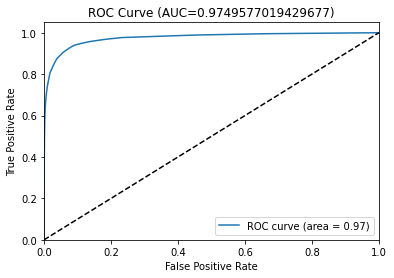

None

 ROC test 


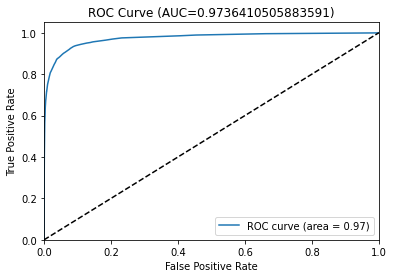

None

In [58]:
if 'best_tree' not in locals():
    with open('best_tree.pkl','rb') as f:
        best_tree = pickle.load(f)
mine.metrics_master_class(X_train_class, y_train_class, X_test_class, y_test_class, best_tree)

### Gradiente estocastico descendente

In [59]:
from sklearn.linear_model import SGDClassifier

In [60]:
sgd = SGDClassifier()

param_dist = dict(loss = ["log"],
                 penalty=["l2","l1","elasticnet"],
                 alpha=np.arange(0.00001,.3,.001))

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

 Métricas Train 
   Exactitud : 0.961
   Precision : 0.978
   Recall : 0.980
   f1_score : 0.979
   TPR : 0.980
   FPR : 0.287


 Métricas Test 
   Exactitud : 0.962
   Precision : 0.979
   Recall : 0.980
   f1_score : 0.979
   TPR : 0.980
   FPR : 0.281


 Matríz de confusión de Train 


Observacion_low  Observacion_high
Prediccion_low            364642              7547
Prediccion_high             8047             19959



 Matríz de confusión de Test 


Observacion_low  Observacion_high
Prediccion_low            156352              3175
Prediccion_high             3373              8613

 ROC train 


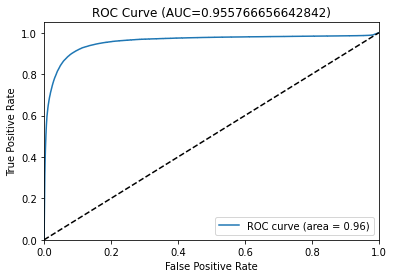

None

 ROC test 


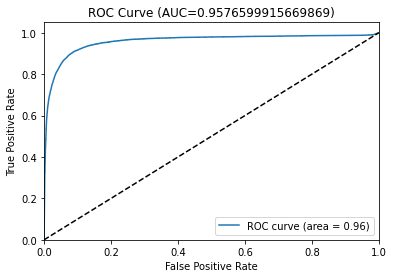

None

In [61]:
if 'best_sgd' not in locals():
    with open('best_sgd.pkl','rb') as f:
        best_sgd = pickle.load(f)
mine.metrics_master_class(X_train_class, y_train_class, X_test_class, y_test_class, best_sgd)

### SVC

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(random_state = 0,probability=True)

param_grid = dict(kernel=['poly', 'rbf', 'sigmoid'])

In [64]:
#Tomando muestras del dataset para reducir el tiempo de entrenamiento
random.seed(0)
sample_index = random.sample(list(X_train_class.index),15_000)
X_train_class_sample = X_train_class[X_train_class.index.isin(sample_index)]
y_train_class_sample = y_train_class[y_train_class.index.isin(sample_index)]

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

 Métricas Train 
   Exactitud : 0.931
   Precision : 1.000
   Recall : 0.931
   f1_score : 0.964
   TPR : 0.931
   FPR : 0.769


 Métricas Test 
   Exactitud : 0.931
   Precision : 1.000
   Recall : 0.931
   f1_score : 0.964
   TPR : 0.931
   FPR : 1.000


 Matríz de confusión de Train 


Observacion_low  Observacion_high
Prediccion_low            372679             27503
Prediccion_high               10                 3



 Matríz de confusión de Test 


Observacion_low  Observacion_high
Prediccion_low            159718             11788
Prediccion_high                7                 0

 ROC train 


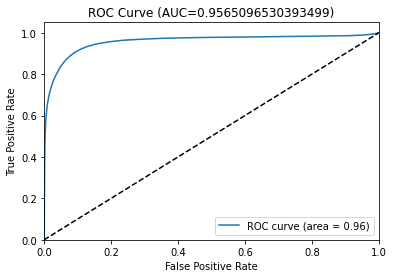

None

 ROC test 


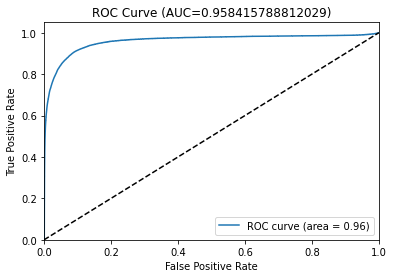

None

In [65]:
if 'best_svc' not in locals():
    with open('best_svc.pkl','rb') as f:
        best_svc = pickle.load(f)
mine.metrics_master_class(X_train_class, y_train_class, X_test_class, y_test_class, best_svc)

### Regresión logistica

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log= LogisticRegression()

param_grid = dict(solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 penalty=["l2","l1","elasticnet"])

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

 Métricas Train 
   Exactitud : 0.968
   Precision : 0.992
   Recall : 0.974
   f1_score : 0.983
   TPR : 0.974
   FPR : 0.143


 Métricas Test 
   Exactitud : 0.968
   Precision : 0.992
   Recall : 0.974
   f1_score : 0.983
   TPR : 0.974
   FPR : 0.142


 Matríz de confusión de Train 


Observacion_low  Observacion_high
Prediccion_low            369769             10037
Prediccion_high             2920             17469



 Matríz de confusión de Test 


Observacion_low  Observacion_high
Prediccion_low            158470              4213
Prediccion_high             1255              7575

 ROC train 


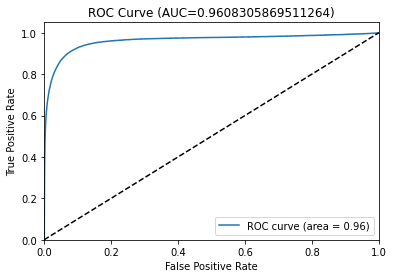

None

 ROC test 


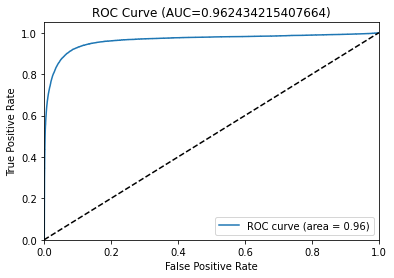

None

In [68]:
if 'best_log' not in locals():
    with open('best_log.pkl','rb') as f:
        best_log = pickle.load(f)
mine.metrics_master_class(X_train_class, y_train_class, X_test_class, y_test_class, best_log)

### KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier()

param_grid = dict(n_neighbors = range(5,91,2))

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

 Métricas Train 
   Exactitud : 0.967
   Precision : 0.992
   Recall : 0.973
   f1_score : 0.982
   TPR : 0.973
   FPR : 0.152


 Métricas Test 
   Exactitud : 0.967
   Precision : 0.992
   Recall : 0.973
   f1_score : 0.982
   TPR : 0.973
   FPR : 0.152


 Matríz de confusión de Train 


Observacion_low  Observacion_high
Prediccion_low            369580             10213
Prediccion_high             3109             17293



 Matríz de confusión de Test 


Observacion_low  Observacion_high
Prediccion_low            158406              4411
Prediccion_high             1319              7377

 ROC train 


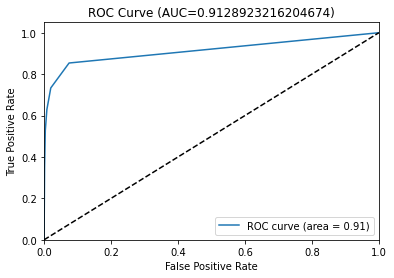

None

 ROC test 


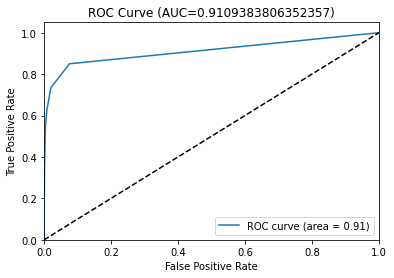

None

In [71]:
if 'best_knn' not in locals():
    with open('best_knn.pkl','rb') as f:
        best_knn = pickle.load(f)
mine.metrics_master_class(X_train_class, y_train_class, X_test_class, y_test_class, best_knn)

### Mejores modelos de clasificación
1°	Decision Trees  
2°	Logistic Regression  
3°	SGD (Stochastic Gradient Descent)  

### Pruebas de estabilidad 
completo en el archivo excel

#### árboles de decisión

In [72]:
mine.estabilidad_class(df.drop(columns=['c_fare_amount','v_fare_class']),best_tree)

Proba     low   high
0    (0,0.1]  506069      0
0  (0.1,0.2]   18264      0
0  (0.2,0.3]    6363      0
0  (0.3,0.4]    5856      0
0  (0.4,0.5]    3248      0
0  (0.5,0.6]      12   3791
0  (0.6,0.7]       0    999
0  (0.7,0.8]       0   3699
0  (0.8,0.9]       0   2146
0  (0.9,1.0]       0  21012

#### gradiente estocástico descendiente

In [73]:
mine.estabilidad_class(df.drop(columns=['c_fare_amount','v_fare_class']),best_sgd)

Proba     low   high
0    (0,0.1]  528338      0
0  (0.1,0.2]    1267      0
0  (0.2,0.3]     884      0
0  (0.3,0.4]     623      0
0  (0.4,0.5]     604      0
0  (0.5,0.6]       0    564
0  (0.6,0.7]       0    641
0  (0.7,0.8]       0    698
0  (0.8,0.9]       0   1050
0  (0.9,1.0]       0  27957

#### regresion logistica

In [74]:
mine.estabilidad_class(df.drop(columns=['c_fare_amount','v_fare_class']),best_log)

Proba     low   high
0    (0,0.1]  502753      0
0  (0.1,0.2]   20653      0
0  (0.2,0.3]    9170      0
0  (0.3,0.4]    5736      0
0  (0.4,0.5]    4177      0
0  (0.5,0.6]       0   3744
0  (0.6,0.7]       0   3772
0  (0.7,0.8]       0   4265
0  (0.8,0.9]       0   5530
0  (0.9,1.0]       0  11722

#### Guardado del pipeline de clasificación incluyendo el mejor modelo

In [75]:
pipeline_list_class = pipeline_list.copy()
pipeline_list_class.append(('clasificador',best_tree))

In [76]:
pipeline_class = Pipeline(pipeline_list_class)
#guardando el pipeline de clasificación
#with open('pipeline_class.pkl','wb') as f:
#    pickle.dump(pipeline_class, f)

In [77]:
#probando predicción del pipeline
pipeline_class.predict(df_test[:5])

array([0., 0., 0., 0., 0.])

In [78]:
#revisando valores reales (low_fare = 0  |  high_fare = 1)
df_test[:5]['fare_class']

0    low_fare
1    low_fare
2    low_fare
3    low_fare
4    low_fare
Name: fare_class, dtype: object

# Regresión
objetivo: fare_amount

No se empleará grid serach ni cross validation por su gran tiempo de entrenamiento.
Para algunos modelos se usaran datasets más chicos de entrenamiento.

In [79]:
#tomando muestras de entrenamiento más pequeñas
random.seed(0)
sample_index = random.sample(list(X_train_regr.index),100_000)
X_train_regr_sample = X_train_regr[X_train_regr.index.isin(sample_index)]
y_train_regr_sample = y_train_regr[y_train_regr.index.isin(sample_index)]

### Regresión lineal 
(primer acercamiento al problema)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
linear=LinearRegression()

In [82]:
linear.fit(X_train_regr,y_train_regr)

LinearRegression()

In [83]:
mine.metrics_master_regr(X_train_regr, y_train_regr, X_test_regr, y_test_regr, linear)

 Métricas Train 
MAE : 3.434
MSE : 30.136
RMSE : 5.490
MAPE : 0.402
R2 : 0.271
R2 Adj: 0.270


 Métricas Test 
MAE : 3.440
MSE : 31.353
RMSE : 5.599
MAPE : 0.402
R2 : 0.244
R2 Adj: 0.244


La regresión parece no ser tan mala.

### Random Forest Regresor

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
random_f= RandomForestRegressor()

param_dist = dict(n_estimators = range(150,251,50),)

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

In [86]:
if 'best_forest' not in locals():
    with open('best_forest.pkl','rb') as f:
        best_forest = pickle.load(f)
mine.metrics_master_regr(X_train_regr, y_train_regr, X_test_regr, y_test_regr, best_forest)

 Métricas Train 
MAE : 1.389
MSE : 5.386
RMSE : 2.321
MAPE : 0.155
R2 : 0.870
R2 Adj: 0.870


 Métricas Test 
MAE : 1.644
MSE : 6.799
RMSE : 2.607
MAPE : 0.182
R2 : 0.836
R2 Adj: 0.836


### Regresión Lasso

In [87]:
from sklearn.linear_model import Lasso

In [88]:
lasso= Lasso()

param_dist = dict(max_iter = range(200,210),
                 alpha=np.arange(0.1,1,.1))

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

In [89]:
if 'best_lasso' not in locals():
    with open('best_lasso.pkl','rb') as f:
        best_lasso = pickle.load(f)
mine.metrics_master_regr(X_train_regr, y_train_regr, X_test_regr, y_test_regr, best_lasso)

 Métricas Train 
MAE : 3.634
MSE : 32.673
RMSE : 5.716
MAPE : 0.426
R2 : 0.209
R2 Adj: 0.209


 Métricas Test 
MAE : 3.635
MSE : 30.172
RMSE : 5.493
MAPE : 0.426
R2 : 0.273
R2 Adj: 0.273


### Regresión RIDGE

In [90]:
from sklearn.linear_model import Ridge

In [91]:
ridge=Ridge()
param_grid = dict(alpha=np.arange(0.1,10,.5))

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

In [92]:
if 'best_ridge' not in locals():
    with open('best_ridge.pkl','rb') as f:
        best_ridge = pickle.load(f)
mine.metrics_master_regr(X_train_regr, y_train_regr, X_test_regr, y_test_regr, best_ridge)

 Métricas Train 
MAE : 3.434
MSE : 30.136
RMSE : 5.490
MAPE : 0.402
R2 : 0.271
R2 Adj: 0.270


 Métricas Test 
MAE : 3.440
MSE : 31.352
RMSE : 5.599
MAPE : 0.402
R2 : 0.244
R2 Adj: 0.244


### Gradient Boost

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
grad_boost = GradientBoostingRegressor()

param_grid = dict(loss=['ls', 'lad', 'huber'],
                 n_estimators=np.arange(50,200,10),
                  criterion=[ 'mse', 'mae'])

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

In [95]:
if 'best_gb' not in locals():
    with open('best_gb.pkl','rb') as f:
        best_gb = pickle.load(f)
mine.metrics_master_regr(X_train_regr, y_train_regr, X_test_regr, y_test_regr, best_gb)

 Métricas Train 
MAE : 1.740
MSE : 7.309
RMSE : 2.704
MAPE : 0.191
R2 : 0.823
R2 Adj: 0.823


 Métricas Test 
MAE : 1.740
MSE : 7.307
RMSE : 2.703
MAPE : 0.190
R2 : 0.824
R2 Adj: 0.824


### AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostRegressor

In [97]:
ada=AdaBoostRegressor()

param_grid={"n_estimators":range(50,200,10),"learning_rate":np.arange(0.1,2,.3)}

#### <span style='background :yellow' > Active la siguiente celda de entrenamiento con [ Esc+ y ] sobre la celda. </span>

In [98]:
if 'best_ada' not in locals():
    with open('best_ada.pkl','rb') as f:
        best_ada = pickle.load(f)
mine.metrics_master_regr(X_train_regr, y_train_regr, X_test_regr, y_test_regr, best_ada)

 Métricas Train 
MAE : 2.706
MSE : 12.778
RMSE : 3.575
MAPE : 0.364
R2 : 0.691
R2 Adj: 0.691


 Métricas Test 
MAE : 2.706
MSE : 12.717
RMSE : 3.566
MAPE : 0.363
R2 : 0.693
R2 Adj: 0.693


### Mejores Modelos de Regresión
1°	Random Forest  
2°	Gradient Boost  
3°	Ada Boost


### Pruebas de estabilidad 
completo en el archivo excel

***random forest***

In [99]:
mine.estabilidad_regr(X_train_regr_sample, y_train_regr_sample, X_test_regr, y_test_regr, best_forest, save=False)

 Train 




 Test 


***gradient boost***

In [100]:
mine.estabilidad_regr(X_train_regr_sample, y_train_regr_sample, X_test_regr, y_test_regr, best_gb, save=False)

 Train 




 Test 


***adaboost***

In [101]:
mine.estabilidad_regr(X_train_regr_sample, y_train_regr_sample, X_test_regr, y_test_regr, best_ada, save=False)

 Train 




 Test 
